# The Spark Foundation: Data Science and Business Analytics Internship

## Task 2: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

### Author: Suraj J. Bhojkar

#### We can perform following steps:

## Importing the important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
%matplotlib inline

## Importing the Dataset

In [2]:
iris = pd.read_csv("C:/Users/HP/Downloads/Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Data Inspecting 

In [3]:
iris.shape

(150, 6)

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Cleaning and transform the Data

### Assgning numbers to the species

In [8]:
iris['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace=True)
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


### checking for the null values in the dataset

In [9]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Droping the ID Column

In [10]:
iris = iris.drop('Id', axis = 1)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Using Kmeans clustering

In [11]:
from sklearn.cluster import KMeans

### Finding the optimal number of clusters

### By Elbow method/SSD

In [12]:
x = iris.iloc[:,[0,1,2,3]].values
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter = 300, n_init=10, random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

wcss

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.535582051282056,
 38.95701115711985,
 34.326529914529914,
 30.227724598930482,
 27.766706937799043,
 26.07225182334006]

### plotting number of clusters vs WCSS

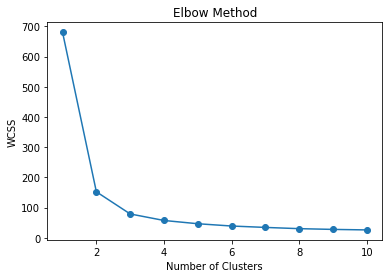

In [13]:
plt.plot(range(1,11),wcss, marker = 'o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

###### We can clearly see why it is called 'The elbow method' from above graph the optimam clusters is where the elbow occurs. This

### using the Silhouette analysis

In [14]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter = 50)
    kmeans.fit(x)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(x, kmeans.labels_)
    print("For n_clusters = {0}, the silhouette score = {1}".format(num_clusters,silhouette_avg))

For n_clusters = 2, the silhouette score = 0.6808136202936816
For n_clusters = 3, the silhouette score = 0.5525919445499757
For n_clusters = 4, the silhouette score = 0.4978256901095472
For n_clusters = 5, the silhouette score = 0.4885175508886279
For n_clusters = 6, the silhouette score = 0.36915443284805083
For n_clusters = 7, the silhouette score = 0.35500051534358884
For n_clusters = 8, the silhouette score = 0.35537845088992726
For n_clusters = 9, the silhouette score = 0.3620887987810993
For n_clusters = 10, the silhouette score = 0.3290258488780541


###### By observing the silhouette analysis and elbow method,
###### we see in the elbow method the range is in between 0.0(2) and 2.5(4.5).
###### from silhouette analysis highest silhouette score is 0.55 for 3 clusters.
                   so let's take k=3

### Applying kmeans to Dataframe: 

In [15]:
kmeans=KMeans(n_clusters=3,init="k-means++", n_init=10,max_iter=300,random_state=1)
y_kmeans=kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


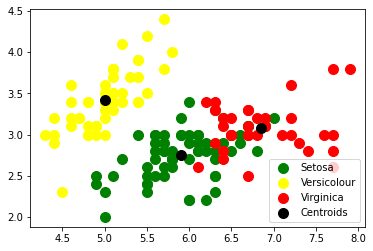

In [16]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c="green",label="Setosa")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c="yellow",label="Versicolour")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c="red",label="Virginica")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s=100,c="black",label="Centroids")
plt.legend()
plt.show()

## From above visualization we can oberserve that there are 3 different clusters of Iris like green, yellow and red in colour and with their centroids which is black in colour.